<a href="https://colab.research.google.com/github/shashigharti/secure-privateai-scholarship-challenge/blob/master/projects/sg_wrldwde-women-cdrs/%5BPytorch%5DNN_from_scratch%2C_Cat_Dog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Practising data analysis for cats-dogs dataset

**Steps:**
*   Download dogs-vs-cats data from kaggle
*   Separate Dataset to Test and Train

In [0]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt
from matplotlib.image import imread
import os

In [0]:
!pip install -q kaggle

In [0]:
!mkdir -p ~/.kaggle

In [0]:
!cp kaggle.json ~/.kaggle/

In [0]:
!chmod 600 /root/.kaggle/kaggle.json

In [195]:
!kaggle competitions download -c dogs-vs-cats

  0% 0.00/86.8k [00:00<?, ?B/s]
100% 86.8k/86.8k [00:00<00:00, 58.9MB/s]
test1.zip: Skipping, found more recently modified local copy (use --force to force download)
 98% 533M/543M [00:04<00:00, 136MB/s]
100% 543M/543M [00:04<00:00, 120MB/s]


In [0]:
!rm -rf /content/data

In [0]:
!mkdir data
!mv /content/train.zip /content/data/
!mv /content/sampleSubmission.csv /content/data/

In [199]:
!unzip /content/data/train.zip -d /content/data/

Archive:  /content/data/train.zip
   creating: /content/data/train/
  inflating: /content/data/train/cat.0.jpg  
  inflating: /content/data/train/cat.1.jpg  
  inflating: /content/data/train/cat.10.jpg  
  inflating: /content/data/train/cat.100.jpg  
  inflating: /content/data/train/cat.1000.jpg  
  inflating: /content/data/train/cat.10000.jpg  
  inflating: /content/data/train/cat.10001.jpg  
  inflating: /content/data/train/cat.10002.jpg  
  inflating: /content/data/train/cat.10003.jpg  
  inflating: /content/data/train/cat.10004.jpg  
  inflating: /content/data/train/cat.10005.jpg  
  inflating: /content/data/train/cat.10006.jpg  
  inflating: /content/data/train/cat.10007.jpg  
  inflating: /content/data/train/cat.10008.jpg  
  inflating: /content/data/train/cat.10009.jpg  
  inflating: /content/data/train/cat.1001.jpg  
  inflating: /content/data/train/cat.10010.jpg  
  inflating: /content/data/train/cat.10011.jpg  
  inflating: /content/data/train/cat.10012.jpg  
  inflating: /co

In [200]:
#check
!find /content/data/train/ -type f -name 'cat*' | wc -l # 12500
!find /content/data/train/ -type f -name 'dog*' | wc -l # 12500

12500
12500


In [0]:
#Make cat dog directories
!mkdir /content/data/Cat_Dog_data
!mkdir -p /content/data/Cat_Dog_data/train/dog
!mkdir -p /content/data/Cat_Dog_data/train/cat

In [0]:
!find /content/data/train -name 'cat*' -type f | shuf -n12500 | xargs -I file mv file /content/data/Cat_Dog_data/train/cat
!find /content/data/train -name 'dog*' -type f | shuf -n12500 | xargs -I file mv file /content/data/Cat_Dog_data/train/dog

['cat.8797.jpg', 'cat.9755.jpg', 'cat.2238.jpg', 'cat.3489.jpg', 'cat.9337.jpg', 'cat.295.jpg', 'cat.11111.jpg', 'cat.9330.jpg', 'cat.8434.jpg', 'cat.4322.jpg', 'cat.1740.jpg', 'cat.8574.jpg', 'cat.4143.jpg', 'cat.4694.jpg', 'cat.4705.jpg', 'cat.10196.jpg', 'cat.3344.jpg', 'cat.3123.jpg', 'cat.7067.jpg', 'cat.9808.jpg', 'cat.9397.jpg', 'cat.1280.jpg', 'cat.358.jpg', 'cat.9352.jpg', 'cat.9034.jpg', 'cat.11892.jpg', 'cat.3604.jpg', 'cat.12466.jpg', 'cat.7090.jpg', 'cat.1488.jpg', 'cat.4265.jpg', 'cat.4514.jpg', 'cat.1651.jpg', 'cat.2874.jpg', 'cat.1375.jpg', 'cat.11438.jpg', 'cat.5847.jpg', 'cat.10398.jpg', 'cat.5931.jpg', 'cat.1154.jpg', 'cat.2470.jpg', 'cat.4861.jpg', 'cat.11065.jpg', 'cat.540.jpg', 'cat.8269.jpg', 'cat.3529.jpg', 'cat.1142.jpg', 'cat.2021.jpg', 'cat.1108.jpg', 'cat.5741.jpg', 'cat.2211.jpg', 'cat.4886.jpg', 'cat.898.jpg', 'cat.2223.jpg', 'cat.2256.jpg', 'cat.2610.jpg', 'cat.2026.jpg', 'cat.4500.jpg', 'cat.2447.jpg', 'cat.11725.jpg', 'cat.1695.jpg', 'cat.5978.jpg', 'ca

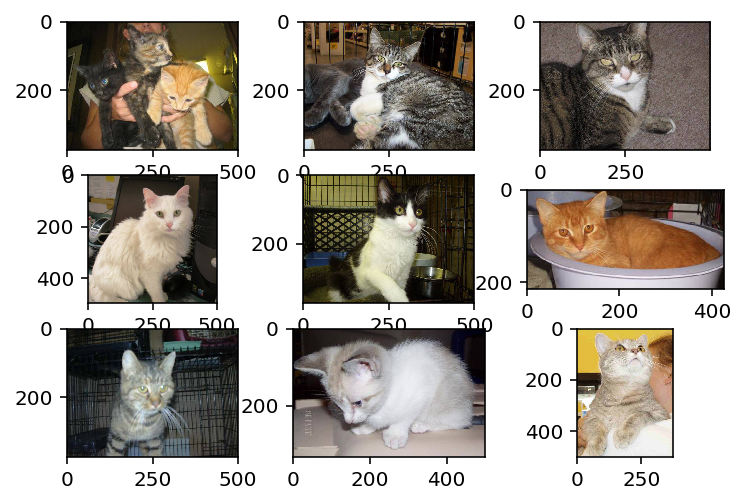

['dog.3385.jpg', 'dog.7471.jpg', 'dog.827.jpg', 'dog.5926.jpg', 'dog.1431.jpg', 'dog.2065.jpg', 'dog.11494.jpg', 'dog.10346.jpg', 'dog.8189.jpg', 'dog.5242.jpg', 'dog.11179.jpg', 'dog.6556.jpg', 'dog.11203.jpg', 'dog.3350.jpg', 'dog.5375.jpg', 'dog.8757.jpg', 'dog.8161.jpg', 'dog.11935.jpg', 'dog.5169.jpg', 'dog.1883.jpg', 'dog.4175.jpg', 'dog.7725.jpg', 'dog.1943.jpg', 'dog.8743.jpg', 'dog.7376.jpg', 'dog.2110.jpg', 'dog.1264.jpg', 'dog.7619.jpg', 'dog.6842.jpg', 'dog.4597.jpg', 'dog.8102.jpg', 'dog.2151.jpg', 'dog.6744.jpg', 'dog.831.jpg', 'dog.4356.jpg', 'dog.7728.jpg', 'dog.8073.jpg', 'dog.4889.jpg', 'dog.9649.jpg', 'dog.771.jpg', 'dog.3715.jpg', 'dog.3769.jpg', 'dog.4753.jpg', 'dog.11213.jpg', 'dog.2474.jpg', 'dog.597.jpg', 'dog.6330.jpg', 'dog.1745.jpg', 'dog.8695.jpg', 'dog.2469.jpg', 'dog.9400.jpg', 'dog.2116.jpg', 'dog.8809.jpg', 'dog.9797.jpg', 'dog.9022.jpg', 'dog.10024.jpg', 'dog.9775.jpg', 'dog.8980.jpg', 'dog.9831.jpg', 'dog.1961.jpg', 'dog.7861.jpg', 'dog.8053.jpg', 'dog

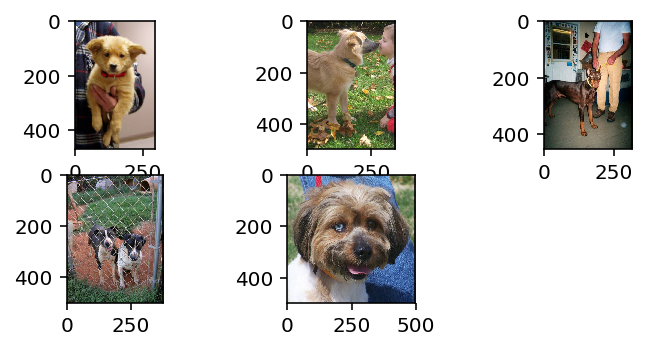

In [207]:
#read all file  names
filenames = os.listdir("/content/data/Cat_Dog_data/train/cat")
print(filenames)

# plot first 5 images of dogs
for i in range(9):
	# define subplot
	plt.subplot(330 + 1 + i)
	# define filename
	filename = "/content/data/Cat_Dog_data/train/cat/" + filenames[i]
  
	# load image pixels
	image = imread(filename)
	# plot raw pixel data
	plt.imshow(image)
# show the figure
plt.show()

filenames = os.listdir("/content/data/Cat_Dog_data/train/dog")
print(filenames)

# plot first 5 images of dogs
for i in range(5):
	# define subplot
	plt.subplot(330 + 1 + i)
	# define filename
	filename = "/content/data/Cat_Dog_data/train/dog/" + filenames[i]
  
	# load image pixels
	image = imread(filename)
	# plot raw pixel data
	plt.imshow(image)
# show the figure
plt.show()

In [0]:
import torch
from torch import nn, optim
from torchvision import datasets, transforms
import torch.nn.functional as F

In [0]:
#set data directory
data_dir = '/content/data/Cat_Dog_data'
train_dir = f'{data_dir}/train'
validation_dir = f'{data_dir}/val'

In [0]:
#create a new transform
train_transforms = transforms.Compose([
    transforms.CenterCrop(224), #crop image size
    transforms.ToTensor(),
    transforms.Normalize((0.5, ), (0.5, ))
])

train_dataset = datasets.ImageFolder(train_dir, transform = train_transforms)
trainloader = torch.utils.data.DataLoader(train_dataset, batch_size = 64, shuffle = True)

In [0]:
class Network(nn.Module):
  def __init__(self):
    super().__init__()
    
    self.fc1 = nn.Linear(150528, 512)
    self.fc2 = nn.Linear(512, 256)
    self.fc3 = nn.Linear(256, 64)
    self.fc4 = nn.Linear(64, 10)
    
    self.dropout = nn.Dropout(p=0.2)
    
  def forward(self, x):
    #Flatten the image
    x = x.view(x.shape[0], -1)
       
    
    x = self.dropout(F.relu(self.fc1(x)))
    x = self.dropout(F.relu(self.fc2(x)))
    x = self.dropout(F.relu(self.fc3(x)))
    x = F.log_softmax(self.fc4(x), dim = 1)
    
    return x
model = Network()

In [0]:
epochs = 5
optimizer = optim.Adam(model.parameters(), lr=0.003)
criterion = nn.NLLLoss()

validation_losses, training_losses = [],[]
for epoch in range(epochs):
  training_loss = 0
  validation_loss = 0
  accuracy = 0
  
  for images, labels in trainloader:
    optimizer.zero_grad() #donot remember previous grad
    log_ps = model(images)
    loss = criterion(log_ps, labels)
    loss.backward() #calculate gradient
    optimizer.step() #update weights
    
    training_loss += loss.item()
  print("Training Loss:{:.3f}", (training_loss/len(trainloader)))

In [0]:
#obtain training indices that will be used for  validation
num_train = len(train_dataset)
#get the indices
indices = list(range(num_train))